In [152]:
import pandas as pd
import os

In [153]:
prediction_raw_data = pd.read_parquet("../data/prediction_data_raw.parquet")

In [154]:
prediction_raw_data['datetime'] = pd.to_datetime(prediction_raw_data[['year', 'month', 'day', 'hour']].astype(str).agg('-'.join, axis=1), format='%Y-%m-%d-%H')

In [161]:
prediction_raw_data=prediction_raw_data[prediction_raw_data["year"]>2020]

In [162]:
prediction_raw_data

,station_id,year,month,day,hour,num_docks_available,capacity,percentage_docks_available,datetime


In [158]:
def remove_datetime_duplicates(df):
    l=[]
    for _, group in df.groupby("station_id"):
        station = group.drop_duplicates(subset="datetime", keep="first")
        l.append(station)
    
    result = pd.concat(l,ignore_index=True)
        

    return result

In [159]:
r=remove_datetime_duplicates(prediction_raw_data)

ValueError: No objects to concatenate

In [ ]:
stats=r.groupby("station_id")["datetime"].describe()[["min","max"]]

In [ ]:
plt.scatter(stats["min"], stats.index, c='blue', alpha=0.5)
plt.scatter(stats["max"], stats.index, c='blue', alpha=0.5)

In [125]:
r[(r["station_id"]==1) & (r["year"]==2023) & ((r["month"]==1))].sort_values(by=["day","hour"])

,station_id,year,month,day,hour,num_docks_available,capacity,percentage_docks_available,datetime
24914,1,2023,1,1,0,6.666667,45.0,0.148148,2023-01-01 00:00:00
24942,1,2023,1,1,1,7.250000,45.0,0.161111,2023-01-01 01:00:00
24970,1,2023,1,1,2,6.250000,45.0,0.138889,2023-01-01 02:00:00
24998,1,2023,1,1,3,6.583333,45.0,0.146296,2023-01-01 03:00:00
25026,1,2023,1,1,4,5.833333,45.0,0.129630,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...
25474,1,2023,1,31,19,33.333333,45.0,0.740741,2023-01-31 19:00:00
25502,1,2023,1,31,20,29.333333,45.0,0.651852,2023-01-31 20:00:00
25530,1,2023,1,31,21,26.166667,45.0,0.581481,2023-01-31 21:00:00
25558,1,2023,1,31,22,23.750000,45.0,0.527778,2023-01-31 22:00:00


In [118]:
complete_datetime_range = pd.date_range(start='2023-01-01 00:00:00', end='2023-12-31 23:00:00', freq='H')

In [126]:
unique_datetimes = r[r["station_id"]==2]['datetime']
missing_datetimes = set(complete_datetime_range) - set(unique_datetimes)

In [127]:
missing_datetimes

{Timestamp('2023-01-04 15:00:00'),
 Timestamp('2023-01-04 16:00:00'),
 Timestamp('2023-01-04 17:00:00'),
 Timestamp('2023-01-04 18:00:00'),
 Timestamp('2023-01-04 19:00:00'),
 Timestamp('2023-01-27 14:00:00'),
 Timestamp('2023-01-27 15:00:00'),
 Timestamp('2023-01-27 16:00:00'),
 Timestamp('2023-01-27 17:00:00'),
 Timestamp('2023-01-27 18:00:00'),
 Timestamp('2023-01-27 19:00:00'),
 Timestamp('2023-01-27 20:00:00'),
 Timestamp('2023-01-27 21:00:00'),
 Timestamp('2023-01-27 22:00:00'),
 Timestamp('2023-01-27 23:00:00'),
 Timestamp('2023-01-28 00:00:00'),
 Timestamp('2023-01-28 01:00:00'),
 Timestamp('2023-01-28 02:00:00'),
 Timestamp('2023-01-28 03:00:00'),
 Timestamp('2023-01-28 04:00:00'),
 Timestamp('2023-01-28 05:00:00'),
 Timestamp('2023-01-28 06:00:00'),
 Timestamp('2023-01-28 07:00:00'),
 Timestamp('2023-01-28 08:00:00'),
 Timestamp('2023-01-28 09:00:00'),
 Timestamp('2023-01-28 10:00:00'),
 Timestamp('2023-01-28 11:00:00'),
 Timestamp('2023-01-28 12:00:00'),
 Timestamp('2023-01-

In [103]:
r[r["station_id"]==2].duplicated().sum()

0

In [91]:
r[r["station_id"]==230]["datetime"].describe()["min","max"]

KeyError: 'key of type tuple not found and not a MultiIndex'

In [82]:
r.station_id.value_counts().sort_index()

station_id
1      33039
2      32458
3      33114
4      33056
5      32763
       ...  
519    29876
520      508
529       23
530        3
532       47
Name: count, Length: 516, dtype: int64

In [69]:
r = remove_datetime_duplicates(station_1)

KeyboardInterrupt: 

In [65]:
station_1 = prediction_raw_data[prediction_raw_data["station_id"]==1].copy()
station_1.drop_duplicates(subset="datetime", keep="first", inplace=True, ignore_index=True)

<Axes: xlabel='datetime'>

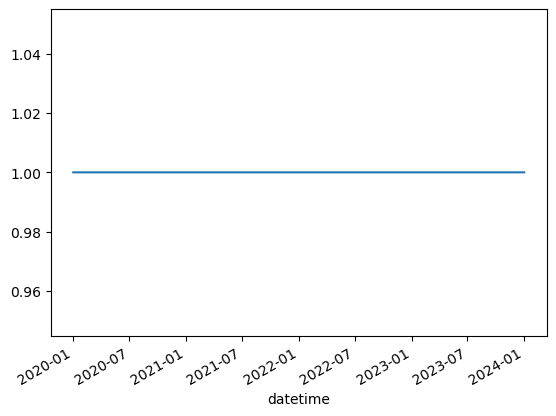

In [58]:
station_1["datetime"].value_counts().plot()

In [41]:
station_1[station_1["datetime"].duplicated(keep=False)].sort_values("datetime")

,station_id,year,month,day,hour,num_docks_available,capacity,percentage_docks_available,datetime
641,1,2020,1,31,22,20.181818,45.0,0.448485,2020-01-31 22:00:00
279377,1,2020,1,31,22,17.000000,45.0,0.377778,2020-01-31 22:00:00
279376,1,2020,2,29,22,18.181818,45.0,0.404040,2020-02-29 22:00:00
567515,1,2020,2,29,22,16.000000,45.0,0.355556,2020-02-29 22:00:00
731317,1,2020,4,30,21,23.000000,45.0,0.511111,2020-04-30 21:00:00
...,...,...,...,...,...,...,...,...,...
15793310,1,2023,10,31,23,18.909091,45.0,0.420202,2023-10-31 23:00:00
16150774,1,2023,11,30,22,7.000000,45.0,0.155556,2023-11-30 22:00:00
15793278,1,2023,11,30,22,12.833333,45.0,0.285185,2023-11-30 22:00:00
15793309,1,2023,11,30,23,2.666667,45.0,0.059259,2023-11-30 23:00:00


In [25]:
prediction_raw_data.groupby("station_id").size()

station_id
1      33111
2      32527
3      33183
4      33127
5      32835
       ...  
519    29943
520      510
529       23
530        3
532       47
Length: 516, dtype: int64

In [32]:
prediction_raw_data[prediction_raw_data.isna().any(axis=1)]

,station_id,year,month,day,hour,num_docks_available,capacity,percentage_docks_available,datetime
28769,48,2020,1,1,0,0.583333,NaN,NaN,2020-01-01 00:00:00
28770,48,2020,1,2,0,16.166667,NaN,NaN,2020-01-02 00:00:00
28771,48,2020,1,3,0,9.833333,NaN,NaN,2020-01-03 00:00:00
28772,48,2020,1,4,0,3.916667,NaN,NaN,2020-01-04 00:00:00
28773,48,2020,1,5,0,1.333333,NaN,NaN,2020-01-05 00:00:00
...,...,...,...,...,...,...,...,...,...
16503795,487,2023,12,28,23,20.000000,NaN,NaN,2023-12-28 23:00:00
16503796,487,2023,12,29,23,23.000000,NaN,NaN,2023-12-29 23:00:00
16503797,487,2023,11,30,23,25.000000,NaN,NaN,2023-11-30 23:00:00
16503798,487,2023,12,30,23,24.000000,NaN,NaN,2023-12-30 23:00:00


In [26]:
prediction_raw_data[prediction_raw_data["station_id"]==530]

,station_id,year,month,day,hour,num_docks_available,capacity,percentage_docks_available,datetime
2160020,530,2020,8,12,8,99.0,NaN,NaN,2020-08-12 08:00:00
2160021,530,2020,8,12,9,99.0,NaN,NaN,2020-08-12 09:00:00
3562601,530,2020,12,3,15,99.0,NaN,NaN,2020-12-03 15:00:00


In [20]:
prediction_raw_data[prediction_raw_data["station_id"]==1]["datetime"].nunique()

33039